In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import seaborn as sns

In [3]:
df = pd.read_csv('Staphylococcus_aureus_Infection_Data.csv')


In [4]:
df = df.dropna()
df.head()

,Unnamed: 0,AGE_GRP,ThirtyDay_Death,SixWeek_Death,ThreeMo_Death,SixMo_Death,NineMo_Death,OneYear_Death,Charlson_WIC,Protein 1,...,Protein 2084,Protein 2085,Protein 2086,Protein 2087,Protein 2088,Protein 2089,Protein 2090,Protein 2091,Protein 2092,Protein 2093
1,102,51-60,False,False,False,False,False,False,0.0,0.216912,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,103,51-60,False,False,False,False,False,False,2.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,105,71-80,True,True,True,True,True,True,4.0,0.224415,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,108,61-70,False,False,False,False,False,False,5.0,-0.080960,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,109,51-60,False,False,False,False,False,False,1.0,0.013984,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
y = df.iloc[:, 7]
y=y.astype('int')
x = df.iloc[:, df.columns != {'ThirtyDay_Death', 'SixWeek_Death', 'ThreeMo_Death', 'SixMo_Death','NineMo_Death', 'OneYear_Death'}]
x.drop(columns=['ThirtyDay_Death', 'SixWeek_Death', 'ThreeMo_Death', 'SixMo_Death','NineMo_Death', 'OneYear_Death'], inplace=True)
x
y.iloc[:]


1       0
2       0
3       1
4       0
5       0
       ..
6182    0
6183    0
6184    1
6185    0
6186    1
Name: OneYear_Death, Length: 5547, dtype: int32

In [6]:
z = 0
for i in range(5547):
    if( type(x.iloc[i,1]) != type(float(0))):
        z = x.iloc[i,1][:2]
        x.iloc[i,1] = int(z)
        if(x.iloc[i,1] == 0):
            x.iloc[i,1] = 1
    else:
        x.iloc[i,1] = 1

In [7]:
x=x.astype('int')


In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [9]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)

In [10]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[593, 186],
       [177, 154]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

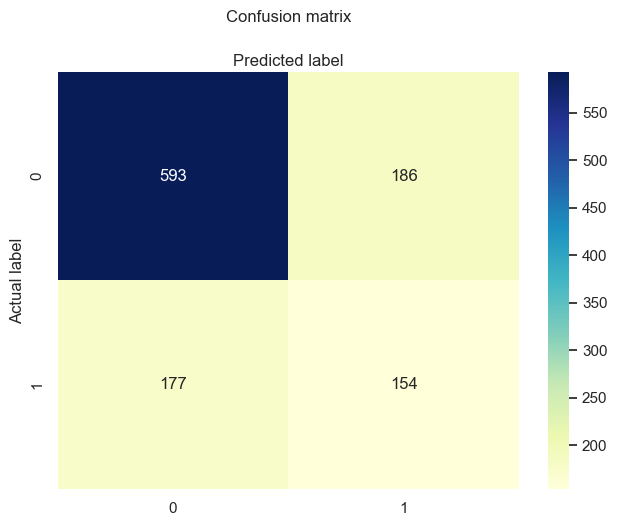

In [11]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [14]:
from sklearn.metrics import classification_report
target_names = ['doesn\'t die', 'dies']
print(classification_report(y_test, y_pred, target_names=target_names))
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

 doesn't die       0.77      0.76      0.77       779
        dies       0.45      0.47      0.46       331

    accuracy                           0.67      1110
   macro avg       0.61      0.61      0.61      1110
weighted avg       0.68      0.67      0.67      1110



0.672972972972973

In [15]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.672972972972973


In [21]:
accuracy = accuracy_score(y_test, y_pred)
accuracy_percent = accuracy * 100
print(f"Test Accuracy: {accuracy_percent:.2f}%")


Test Accuracy: 67.30%


In [20]:
train_accuracy = dt.score(x_train, y_train)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 1.0


Test Accuracy: 67.29729729729729
